In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [ ]:

data = 'vignette-XGBoost/data/Iris.csv'
df = pd.read_csv(data, index_col=0)

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nClass distribution:")
print(df['Species'].value_counts())

Dataset shape: (150, 5)

First few rows:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa

Class distribution:
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [13]:
# Transform species labels to numeric values for XGBoost classifier
# XGBoost requires numeric labels for multi-class classification
# Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
def transform(val):
    if val == "Iris-setosa":
        return 0
    elif val == "Iris-versicolor":
        return 1
    else:
        return 2

df["Species"] = df["Species"].apply(transform)
print("Transformed labels:", df["Species"].unique())

Transformed labels: [0 1 2]


In [ ]:
# Prepare features (X) and target variable (y)
# Features: sepal and petal measurements
# Target: species class (0, 1, or 2)
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = df["Species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 120
Test set size: 30


In [15]:
# Initialize XGBoost classifier
# objective='multi:softmax' - for multi-class classification with class predictions
# eval_metric='merror' - multi-class classification error rate
model = xgb.XGBClassifier(objective='multi:softmax', eval_metric='merror', random_state=42)

# Train the model on training data
model.fit(X_train, y_train)
print("Model training complete!")

Model training complete!


In [16]:
# Make predictions on test set
predictions = model.predict(X_test)

# Evaluate model performance
# Calculate accuracy on both training and test sets
test_accuracy = accuracy_score(y_test, predictions)
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 1.0000


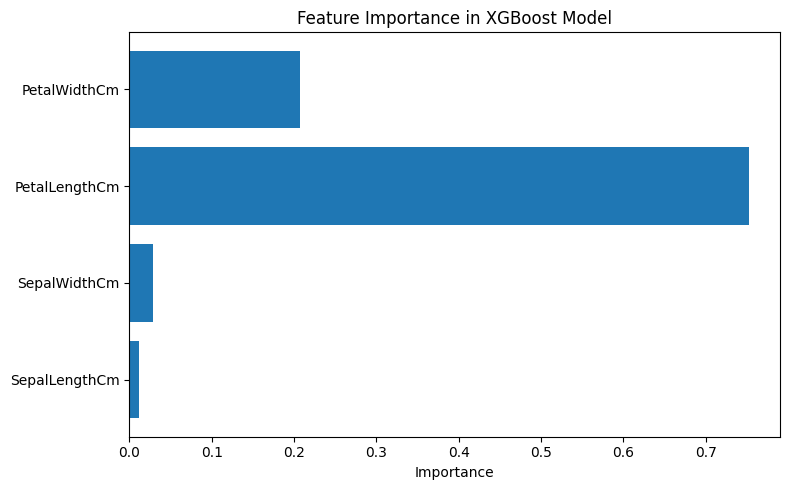

In [ ]:
# Visualize feature importance
import matplotlib.pyplot as plt

feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance in XGBoost Model')
plt.tight_layout()
plt.show()

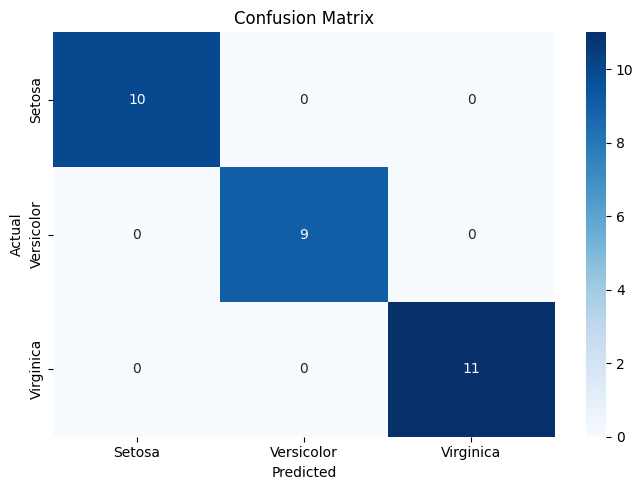

In [18]:
# Confusion matrix to see prediction performance by class
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()